#  Factors Influencing ACT Scores

##  Brief introduction to the data

The data is based on the ACT (which stands for American College Testing) scores from the high schools in California  for the years 2014-2018.
The data contains:
* High school geographic information ( District name, county, city, longitute, latitude)
* Average ACT scores for different subject groups ( English, Reading, Math and Science) and overall ACT scores from 2014 to 2018.
* Total number of students enrolled in high schools.
* Percentage of students from different ethnicities.
* Percentage of free and reduced price lunch offered students which represent the students with low income.
* Percentage of the teachers in their first or second years.

Performing the Exploratory Data Analysis in order to address these questions:
1. What is the distribution of the scores?
2. Which high schools received the highest and lowest overall scores? 
3. Which counties have the highest and lowest performing schools? 
4. On which subjects are the schools performing better?
5. Is there an increase of the success level of schools with time?  
6. What kind of factors influence success levels? 
   *  Ethnicity
   *  Number of low income students
   *  New teacher ratios
   *  Population of the schools
7. Are the parent ratings and great schools ratings related to the school success?

# Exploratory Data Analysis

## Importing Basic Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML,display
import folium 
from folium.plugins import MarkerCluster
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()
sns.set_context("notebook", font_scale=1.25)

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Necessary Functions

In [3]:
# emprical cumulative function
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# pearson correlation coefficient
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

## Load the data and perform basic operations

In [4]:
data = pd.read_csv('~/Capstone-Project-1/Datasets/data.csv')

In [5]:
data.head()

Year Rtype                           Dname    Cname       City  \
0  2014     S  Livermore Valley Joint Unified  Alameda  Livermore   
1  2015     S  Livermore Valley Joint Unified  Alameda  Livermore   
2  2016     S  Livermore Valley Joint Unified  Alameda  Livermore   
3  2017     S  Livermore Valley Joint Unified  Alameda  Livermore   
4  2018     S  Livermore Valley Joint Unified  Alameda  Livermore   

          Sname    Type  gsId        Lat        Lon  Enrollment  Plan504  \
0  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
1  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
2  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
3  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
4  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   

   FreeAnd Reduced PriceLunch  Enroll12  Percent Teachers InFirst SecondYear  \
0                       15.06       467                                  9.1   
1                       15.06       454                                  9.1   
2                       15.06       473                                  9.1   
3                       15.06       470                                  9.1   
4                       15.06       513                                  9.1   

   ActSat Number Participation  NumTstTakr  ApCourse Participation  \
0                          479         108                    28.5   
1                          479         114                    28.5   
2                          479         157                    28.5   
3                          479         158                    28.5   
4                          479         148                    28.5   

   ApCourse Passed  AvgScrEng  AvgScrRead  AvgScrMath  AvgScrSci  NumGE21  \
0              542       26.0        26.0        26.0       26.0       99   
1              542       25.0        25.0        26.0       25.0       95   
2              542       26.0        26.0        26.0       25.0      139   
3              542       26.0        26.0        26.0       25.0      137   
4              542       25.0        26.0        26.0       25.0      126   

   PctGE21  ParentRating  gsRating  Asian  Black, non-Hispanic  Hispanic  \
0    91.67           4.0       9.0   9.96                 1.55     24.58   
1    83.33           4.0       9.0   9.96                 1.55     24.58   
2    88.54           4.0       9.0   9.96                 1.55     24.58   
3    86.71           4.0       9.0   9.96                 1.55     24.58   
4    85.14           4.0       9.0   9.96                 1.55     24.58   

   Multiracial  Native American or Native Alaskan  \
0         7.29                               0.34   
1         7.29                               0.34   
2         7.29                               0.34   
3         7.29                               0.34   
4         7.29                               0.34   

   Native Hawaiian or Other Pacific Islander  White, non-Hispanic  
0                                       0.34                55.95  
1                                       0.34                55.95  
2                                       0.34                55.95  
3                                       0.34                55.95  
4                                       0.34                55.95

In [6]:
data.columns

Index(['Year', 'Rtype', 'Dname', 'Cname', 'City', 'Sname', 'Type', 'gsId',
       'Lat', 'Lon', 'Enrollment', 'Plan504', 'FreeAnd Reduced PriceLunch',
       'Enroll12', 'Percent Teachers InFirst SecondYear',
       'ActSat Number Participation', 'NumTstTakr', 'ApCourse Participation',
       'ApCourse Passed', 'AvgScrEng', 'AvgScrRead', 'AvgScrMath', 'AvgScrSci',
       'NumGE21', 'PctGE21', 'ParentRating', 'gsRating', 'Asian',
       'Black, non-Hispanic', 'Hispanic', 'Multiracial',
       'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic'],
      dtype='object')

Adding a column to the data that shows the overall average act scores

In [7]:
col = data.loc[: , 'AvgScrEng':'AvgScrSci']
data['AvgScr'] = col.mean(axis=1)
data = data.rename(columns={'Cname': 'County'}) #renaming the county column 

In [8]:
# Dividing the data into three subsets for accessing the information 
# easier.

df1 = data[['Sname', 'gsId', 'Dname', 'County', 'City', 'Lat', 'Lon', 'Type', 'Percent Teachers InFirst SecondYear',
           'Plan504', 'FreeAnd Reduced PriceLunch', 'gsRating', 'ParentRating']]
df2 = data[['Year','Sname','Dname','County','Enroll12','NumTstTakr', 'AvgScrEng','AvgScrRead', 'AvgScrMath', 
            'AvgScrSci', 'NumGE21', 'PctGE21','AvgScr']]
df3 = data[['Sname','Enrollment', 'Asian','Black, non-Hispanic', 'Hispanic', 'Multiracial',
            'Native American or Native Alaskan', 'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic']]

The values in df1 and df3 columns are repeated for every year. (2014-2018)

In [9]:
df1 = df1.drop_duplicates(keep='first')
df3 = df3.drop_duplicates(keep='first')

In [10]:
data.head()

Year Rtype                           Dname   County       City  \
0  2014     S  Livermore Valley Joint Unified  Alameda  Livermore   
1  2015     S  Livermore Valley Joint Unified  Alameda  Livermore   
2  2016     S  Livermore Valley Joint Unified  Alameda  Livermore   
3  2017     S  Livermore Valley Joint Unified  Alameda  Livermore   
4  2018     S  Livermore Valley Joint Unified  Alameda  Livermore   

          Sname    Type  gsId        Lat        Lon  Enrollment  Plan504  \
0  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
1  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
2  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
3  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   
4  Granada High  public   148  37.675205 -121.78984      2059.0      2.9   

   FreeAnd Reduced PriceLunch  Enroll12  Percent Teachers InFirst SecondYear  \
0                       15.06       467                                  9.1   
1                       15.06       454                                  9.1   
2                       15.06       473                                  9.1   
3                       15.06       470                                  9.1   
4                       15.06       513                                  9.1   

   ActSat Number Participation  NumTstTakr  ApCourse Participation  \
0                          479         108                    28.5   
1                          479         114                    28.5   
2                          479         157                    28.5   
3                          479         158                    28.5   
4                          479         148                    28.5   

   ApCourse Passed  AvgScrEng  AvgScrRead  AvgScrMath  AvgScrSci  NumGE21  \
0              542       26.0        26.0        26.0       26.0       99   
1              542       25.0        25.0        26.0       25.0       95   
2              542       26.0        26.0        26.0       25.0      139   
3              542       26.0        26.0        26.0       25.0      137   
4              542       25.0        26.0        26.0       25.0      126   

   PctGE21  ParentRating  gsRating  Asian  Black, non-Hispanic  Hispanic  \
0    91.67           4.0       9.0   9.96                 1.55     24.58   
1    83.33           4.0       9.0   9.96                 1.55     24.58   
2    88.54           4.0       9.0   9.96                 1.55     24.58   
3    86.71           4.0       9.0   9.96                 1.55     24.58   
4    85.14           4.0       9.0   9.96                 1.55     24.58   

   Multiracial  Native American or Native Alaskan  \
0         7.29                               0.34   
1         7.29                               0.34   
2         7.29                               0.34   
3         7.29                               0.34   
4         7.29                               0.34   

   Native Hawaiian or Other Pacific Islander  White, non-Hispanic  AvgScr  
0                                       0.34                55.95   26.00  
1                                       0.34                55.95   25.25  
2                                       0.34                55.95   25.75  
3                                       0.34                55.95   25.75  
4                                       0.34                55.95   25.50

In [11]:
round(df2.describe(percentiles=[0.025, 0.25,  0.5,   0.75,  0.975]),2)

Year  Enroll12  NumTstTakr  AvgScrEng  AvgScrRead  AvgScrMath  \
count  8044.00   8044.00     8044.00    8044.00     8044.00     8044.00   
mean   2016.00    393.55       94.97      21.28       22.10       22.03   
std       1.41    205.38       69.62       3.45        3.09        2.90   
min    2014.00      0.00       11.00       8.00       11.00       14.00   
2.5%   2014.00     56.00       16.00      15.00       16.00       17.00   
25%    2015.00    229.00       43.00      19.00       20.00       20.00   
50%    2016.00    414.00       74.00      21.00       22.00       22.00   
75%    2017.00    527.00      128.00      24.00       24.00       24.00   
97.5%  2018.00    784.00      266.00      28.00       28.00       28.00   
max    2018.00   1139.00      538.00      32.00       31.00       32.00   

       AvgScrSci  NumGE21  PctGE21   AvgScr  
count    8044.00  8044.00  8044.00  8044.00  
mean       21.45    58.37    56.01    21.71  
std         2.75    59.38    23.03     2.99  
min        11.00     0.00     0.00    11.25  
2.5%       16.00     4.00     9.96    16.00  
25%        19.00    19.00    38.38    19.50  
50%        22.00    36.00    57.43    21.75  
75%        23.00    76.00    75.34    23.75  
97.5%      27.00   225.93    92.05    27.73  
max        31.00   387.00   100.00    31.50

## 1. What is the distribution of the scores?

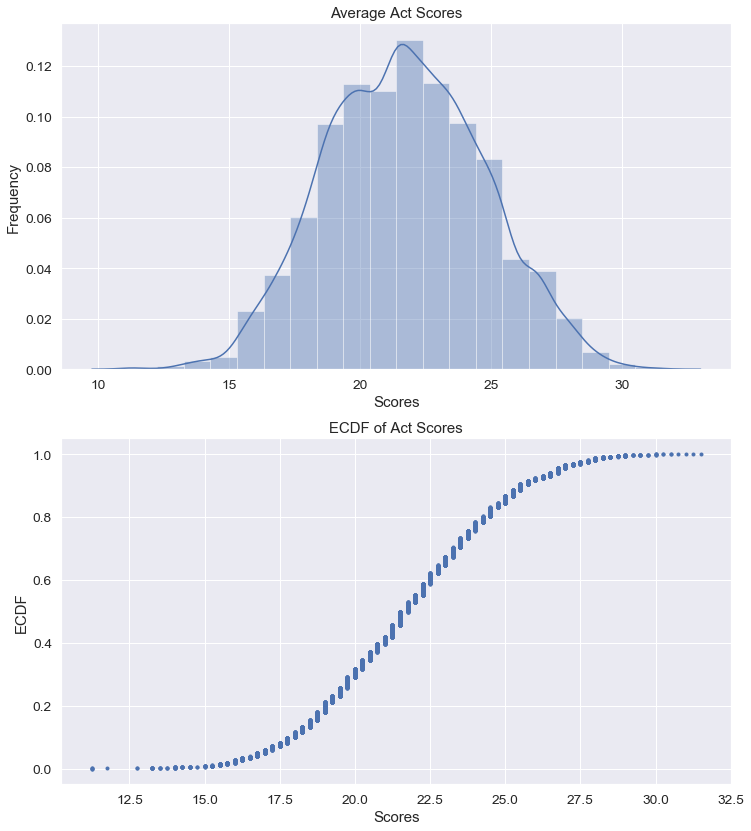

In [12]:
fig, axes = plt.subplots(2,1, figsize=(12,14))

# plotting the distribution of the scores
_ = sns.distplot(data['AvgScr'], ax=axes[0], bins=20)
_ = axes[0].set_xlabel('Scores')
_ = axes[0].set_ylabel('Frequency')
_ = axes[0].set_title('Average Act Scores')

# plotting the ecdf of the scores
e1, e2 = ecdf(data['AvgScr'])
_ = axes[1].plot(e1, e2,marker = '.',linestyle = 'none')
_ = axes[1].set_title('ECDF of Act Scores')
_ = axes[1].set_xlabel('Scores')
_ = axes[1].set_ylabel('ECDF')
plt.show()

We assume that the average scores are normally distributed, and this assumption stands correct looking at the graphs.

## 2. Which  high schools received the highest and lowest overall scores?

Corresponding values for the [2.5,25,50,75,97.5] percentiles are: [16.      19.5     21.75    23.75    27.73125].


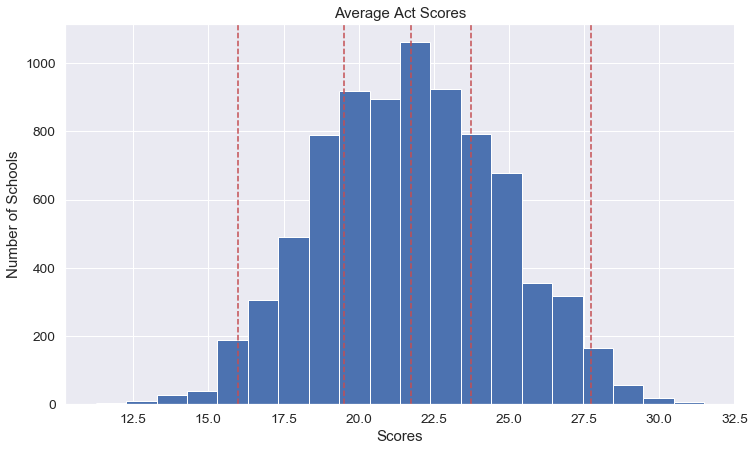

In [13]:
plt.figure(figsize=(12,7))

_ = plt.hist(data['AvgScr'], bins=20)
plt.xlabel('Scores')
plt.ylabel('Number of Schools')
plt.title('Average Act Scores')

# Calculaing the percentiles of overall mean act scores
percentiles = np.array([2.5,25,50,75,97.5])
perct = np.percentile(data['AvgScr'],percentiles)
print(f'Corresponding values for the [2.5,25,50,75,97.5] percentiles are: {perct}.')

# Adding the percentiles on the graph
for i in range(0,5):
    plt.axvline(perct[i], color='r', linestyle='--')

plt.show()

In [14]:
data[['AvgScr']].describe(percentiles=[0.025, 0.25,  0.5,   0.75,  0.975]).transpose()

count       mean       std    min  2.5%   25%    50%    75%  \
AvgScr  8044.0  21.713762  2.989978  11.25  16.0  19.5  21.75  23.75   

           97.5%   max  
AvgScr  27.73125  31.5

## Highest Performing Schools

#### These are the schools which received 28.0 or higher which is the top 2.5%  of the overall average Act scores

In [15]:
high_scr = data[df2['AvgScr'] >= perct[4]]
high_scr = high_scr[['Sname','gsId','County','Lon','Lat','gsRating','ParentRating']].drop_duplicates()
high_scr.head().style.hide_index()

In [16]:
m = folium.Map(width=700,height=500,location=[36.778259, -119.417931],zoom_start=7)
#mc = MarkerCluster().add_to(m)

high_scr['desc'] = high_scr['Sname']+" GreatschoolsRating:"+high_scr['gsRating'].apply(str)+" ParentRating:"+high_scr['ParentRating'].apply(str)

for each in high_scr.iterrows():
    folium.Marker([each[1]['Lat'],each[1]['Lon']],popup=each[1]['desc']).add_to(m)

display(m)

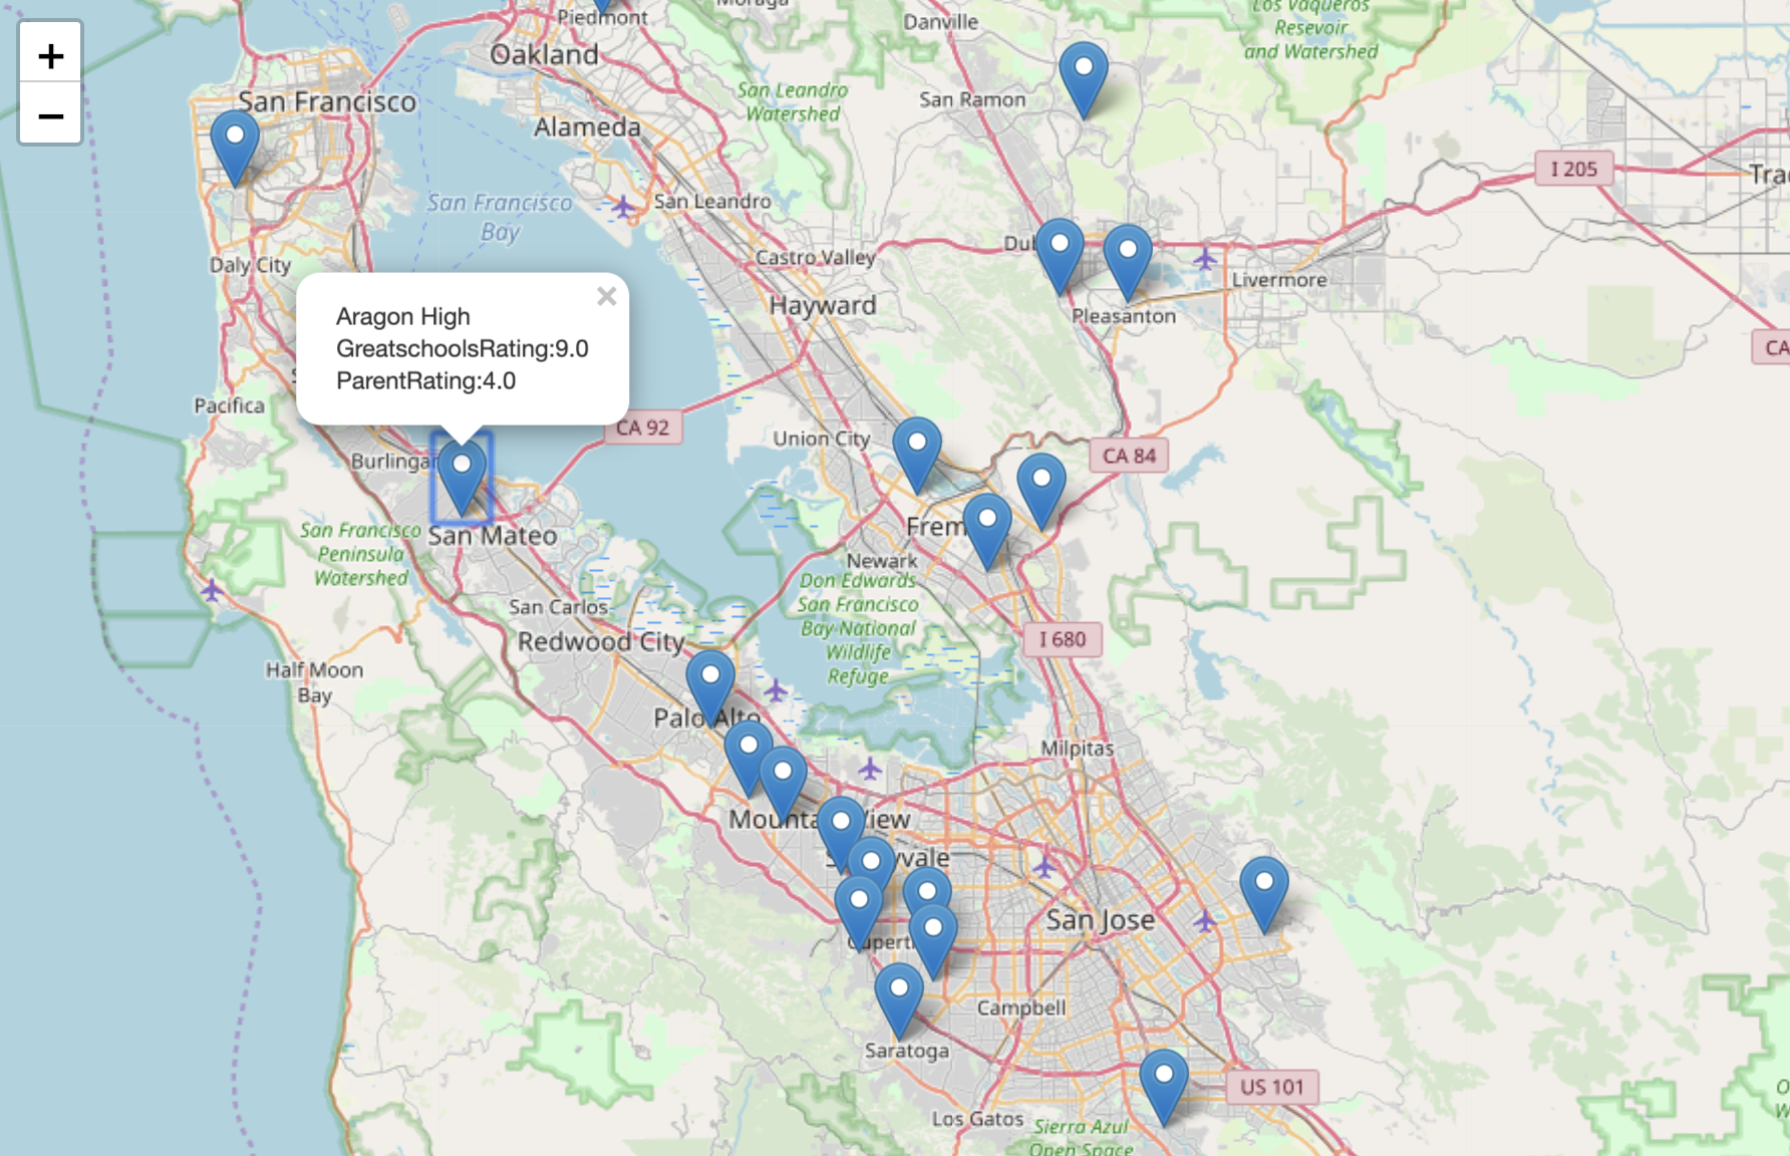

In [17]:
from IPython.display import Image
Image(filename="/Users/meralbalik/Capstone-Project-1/Datasets/hps.png",width=700,height=300 )

## Lowest Performing Schools

#### These are the schools which received 15.25 or lower which is 2.5% of the average scores

In [18]:
low_scr = data[df2['AvgScr'] <= perct[0]]
low_scr = low_scr[['Sname','gsId','County','Lon','Lat','gsRating','ParentRating']].drop_duplicates()
low_scr.head().style.hide_index()

In [19]:
m = folium.Map(width=700,height=500,location=[36.778259, -119.417931],zoom_start=7)
#mc = MarkerCluster().add_to(m)

low_scr['desc'] = low_scr['Sname']+" GreatschoolsRating:"+low_scr['gsRating'].apply(str)+" ParentRating:"+low_scr['ParentRating'].apply(str)

for each in low_scr.iterrows():
    folium.Marker([each[1]['Lat'],each[1]['Lon']],popup=each[1]['desc']).add_to(m)

display(m)

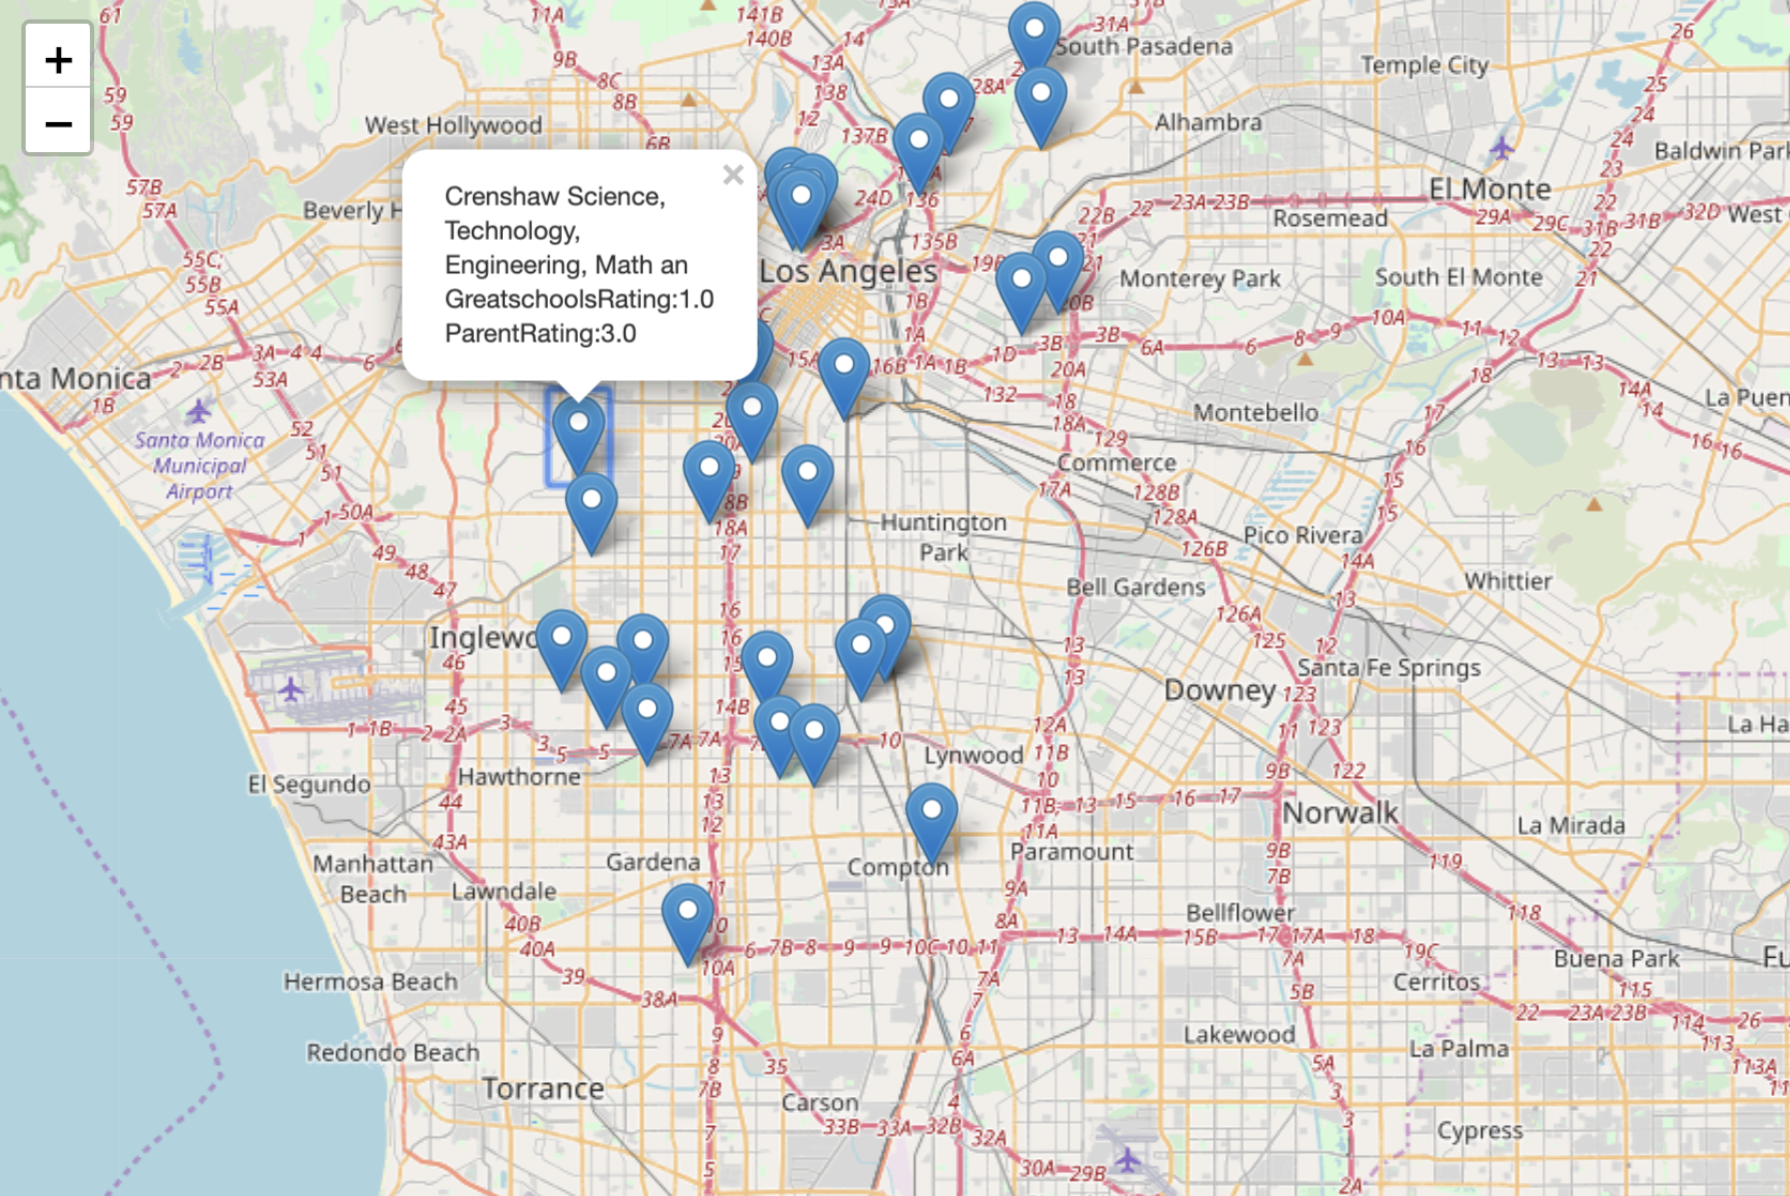

In [20]:
from IPython.display import Image
Image(filename="/Users/meralbalik/Capstone-Project-1/Datasets/lps.png",width=700,height=300 )

In [21]:
round(len(high_scr['Sname'].unique())/len(df2['Sname'].unique())*100,1)

6.2

In [22]:
round(len(low_scr['Sname'].unique())/len(df2['Sname'].unique())*100,1)

8.2

About 4.5% of the schools received 28.00 (top 2.5 %) or above, 6.3% of the schools received 15.00 (2.5%) or less at least once between 2014 and 2018.

## 3. Which counties have the highest and lowest performing schools?

In [23]:
print('The highest performing schools are in the following counties: {}' .format(set(high_scr['County'])))

The highest performing schools are in the following counties: {'San Diego', 'Nevada', 'Santa Clara', 'Marin', 'Santa Cruz', 'Sacramento', 'Alameda', 'Orange', 'San Francisco', 'Los Angeles', 'San Mateo', 'Yolo', 'Contra Costa'}


In [24]:
print('The lowest performing schools are in the following counties: {}' .format(set(low_scr['County'])))

The lowest performing schools are in the following counties: {'San Diego', 'Kings', 'Santa Clara', 'Monterey', 'San Bernardino', 'Sacramento', 'Alameda', 'San Mateo', 'Los Angeles', 'Tulare', 'San Francisco', 'Fresno', 'Contra Costa', 'San Joaquin'}


## 4. On which subjects are the schools performing better?

In [25]:
perc =[0.025, 0.25, 0.5, 0.75, 0.975]
round(data[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']].describe(percentiles = perc),2)

AvgScrEng  AvgScrRead  AvgScrMath  AvgScrSci
count    8044.00     8044.00     8044.00    8044.00
mean       21.28       22.10       22.03      21.45
std         3.45        3.09        2.90       2.75
min         8.00       11.00       14.00      11.00
2.5%       15.00       16.00       17.00      16.00
25%        19.00       20.00       20.00      19.00
50%        21.00       22.00       22.00      22.00
75%        24.00       24.00       24.00      23.00
97.5%      28.00       28.00       28.00      27.00
max        32.00       31.00       32.00      31.00

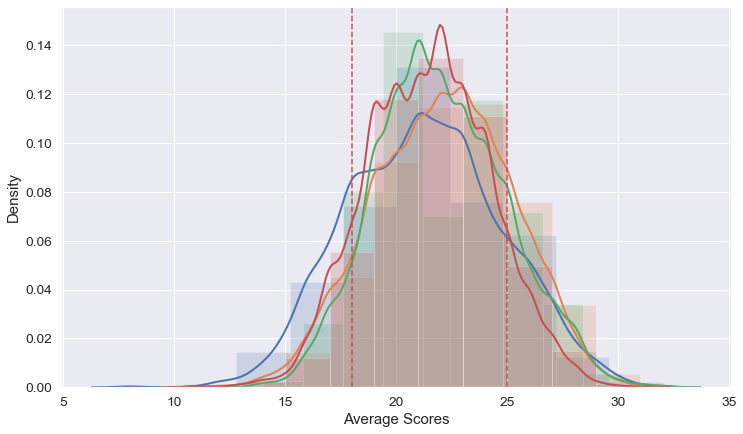

In [26]:
#sns.set()
plt.figure(figsize=(12,7))
subjects = ['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']

for sbj in subjects:
    _ = sns.distplot(df2[sbj], bins=10, kde_kws={"lw": 2, "label": sbj}, hist_kws={"alpha": 0.2})
for x in [18,25]:
    _ = plt.axvline(x=x, color='r', linestyle='--')
plt.xlabel('Average Scores')
plt.show()

The schools in the low score range (<=18) are performing better in English.<br>
The schools in the middle score range (18-25) are performing better in Math and Science, worse in English.<br>
The schools in the high score range (>=25) are performing worse in Science.

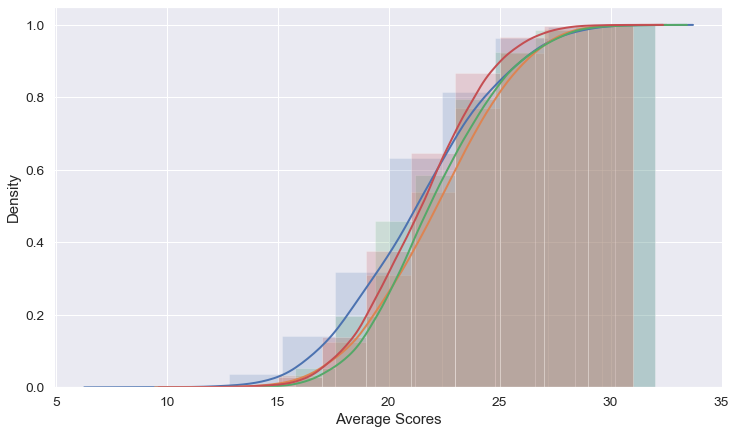

In [27]:
#sns.set()
plt.figure(figsize=(12,7))

for sbj in subjects:
    _ = sns.distplot(df2[sbj],bins=10,  axlabel='Fig', 
    hist_kws={'cumulative': True, "alpha": 0.2}, kde_kws={"lw": 2,'cumulative': True,"label": sbj})
plt.xlabel('Average Scores')
plt.show()

This graph is another representation of scores in different subjects. At the first glance, we can say that almost 60% of the schools received about 22 or less in English. About 40% of the schools received 22.0 or more in Science. This number is less for the other subject tests.

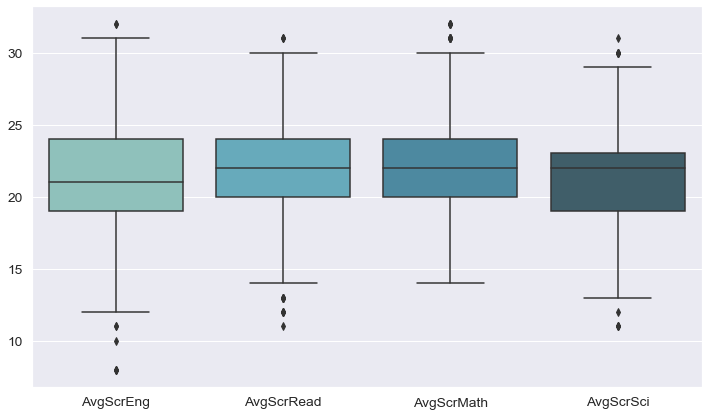

In [28]:
# boxplot representation of the scores
plt.figure(figsize=(12,7))
d = df2[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']]
ax = sns.boxplot(data=d, palette="GnBu_d")

## 5. Is there an increase of the success level of schools with time?

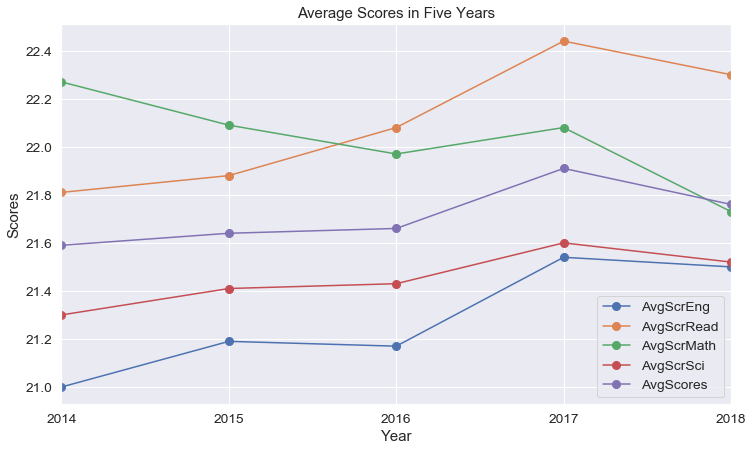

In [29]:
plt.figure(figsize=(12,7))
sch_mean = df2.groupby('Year')[['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','AvgScr']]
sch_mean = round(sch_mean.mean(),2)
_ = plt.plot(sch_mean, marker='o',markersize=8)

plt.legend(['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','AvgScores'])
plt.xticks(sch_mean.index)
plt.title('Average Scores in Five Years')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.xlim(2014,2018)
plt.show()

While average reading, english and science scores are increasing in five years, average math scores are decreasing. On the other hand, overall scores are also increasing.


## 6. What kind of factors influence success levels?

The information that comes from the census data belongs to year 2016. So in this section, I am using only the scores from 2016. 

In [30]:
df = data[data.Year==2016]

In [31]:
# Distribution plots of several factors
def displot(factor, color):
    f, axes = plt.subplots(2,1, figsize=(13, 8))

    _ = sns.distplot(df[factor], kde=False, color=color, ax=axes[0], label='School Count', 
             bins=35).set_title('% ' + factor)
    _ = sns.regplot(y=df["AvgScr"], x=df[factor], marker=".", color=color, ax=axes[1],
                truncate=True, line_kws={"color": color}) 

## i. Ethnicity

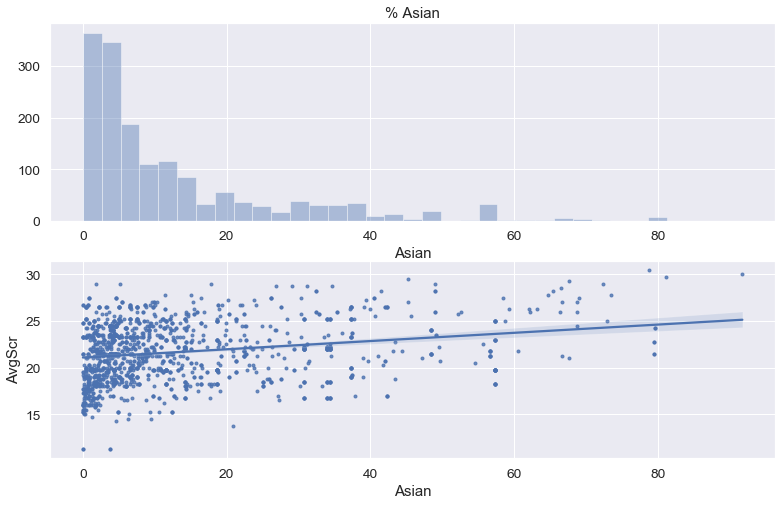

In [32]:
# Distribution plots of Asian students
displot("Asian", "b")

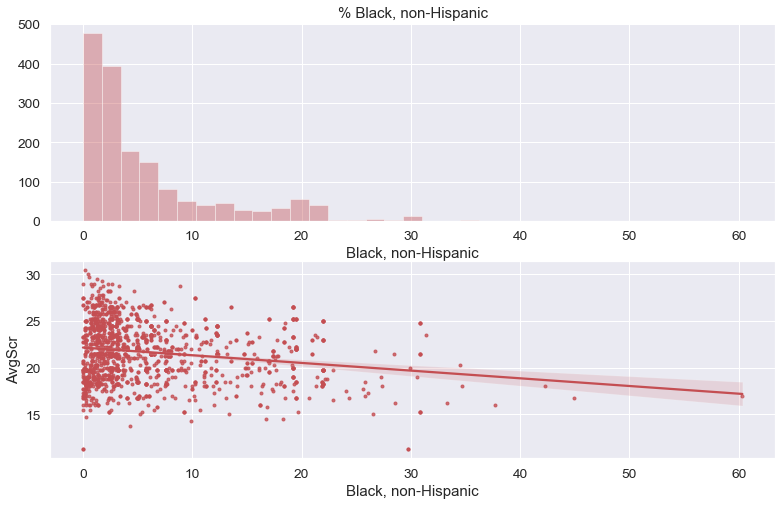

In [33]:
# Distribution plots of Black, non-Hispanic students
displot("Black, non-Hispanic", "r")

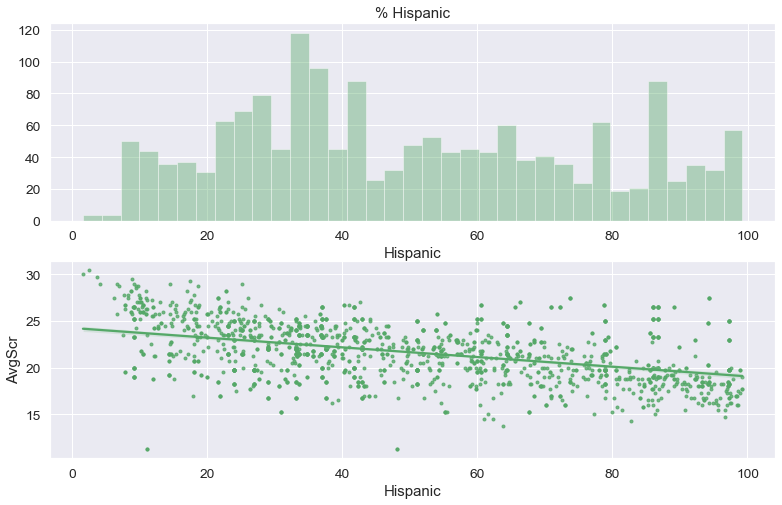

In [34]:
# Distribution plots of Hispanic students
displot("Hispanic", "g")

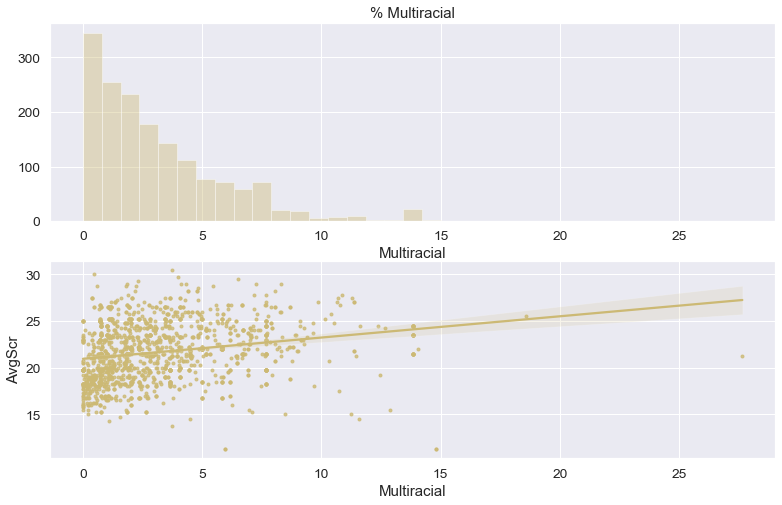

In [35]:
# Distribution plots of Multiracial students
displot("Multiracial", "y")

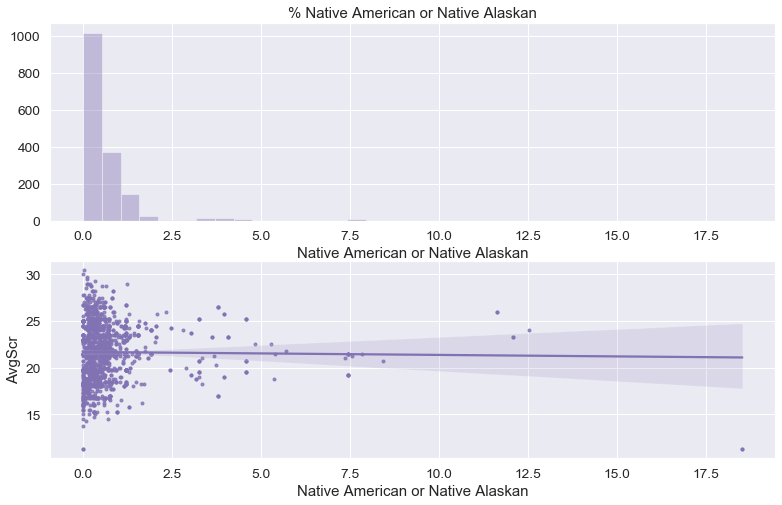

In [36]:
# Distribution plots of Native American or Native Alaskan students
displot("Native American or Native Alaskan", "m")

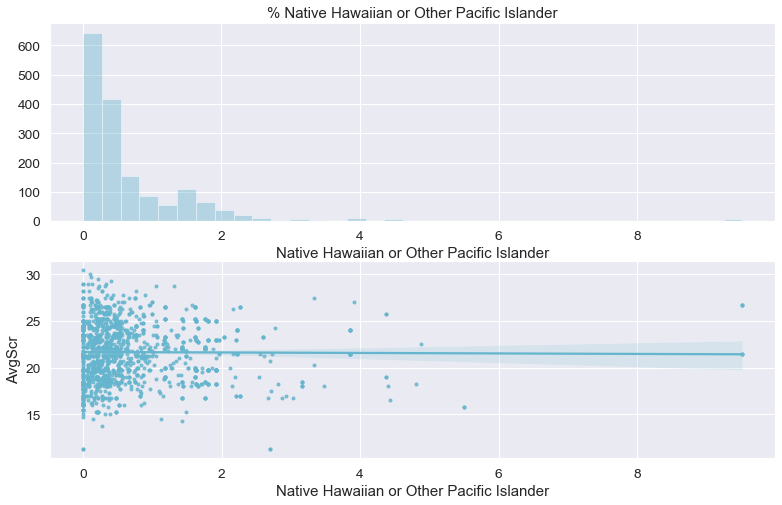

In [37]:
# Distribution plots of Native Hawaiian or Other Pacific Islander students
displot("Native Hawaiian or Other Pacific Islander", "c")

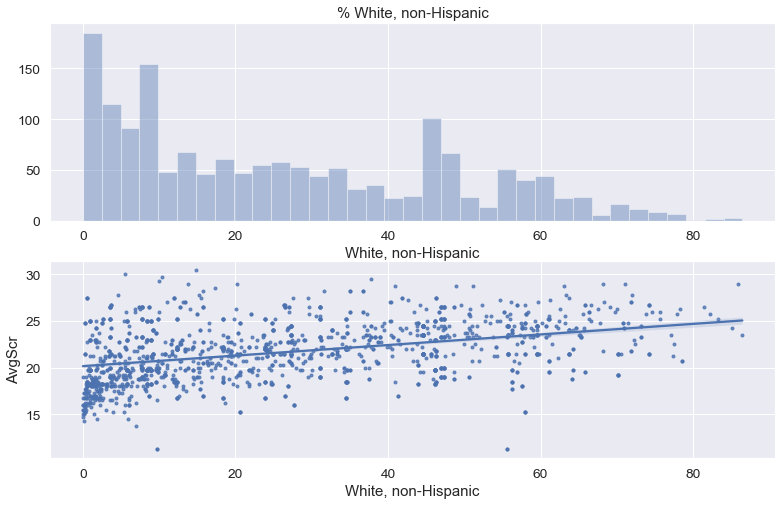

In [38]:
# Distribution plots of White, non-Hispanic students
displot("White, non-Hispanic", "b")

## ii. Number of low income students

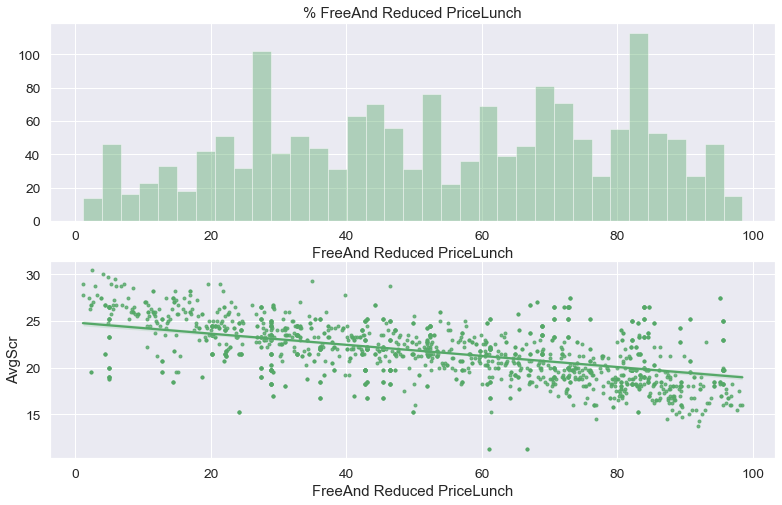

In [39]:
# Distribution plots of Free And Reduced Price Lunch receiving students
displot("FreeAnd Reduced PriceLunch", "g")

## iii. New teacher ratios

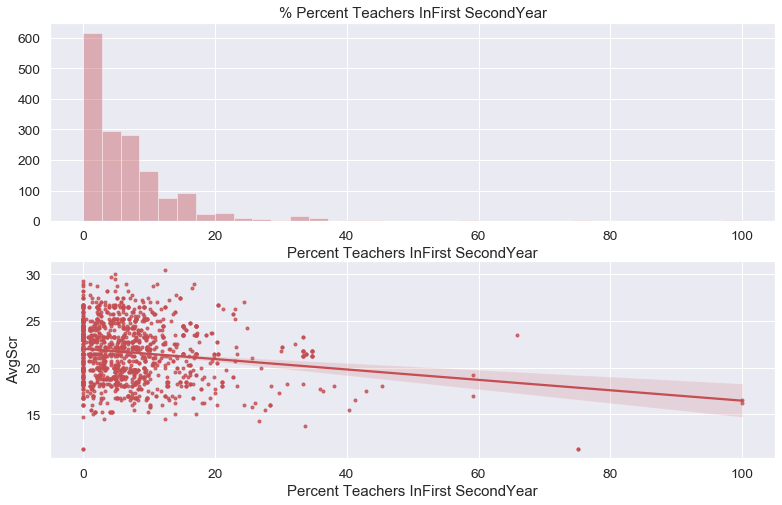

In [40]:
# Distribution plots of Percent Teachers In First SecondYear
displot("Percent Teachers InFirst SecondYear", "r")

## iv. Population of the schools

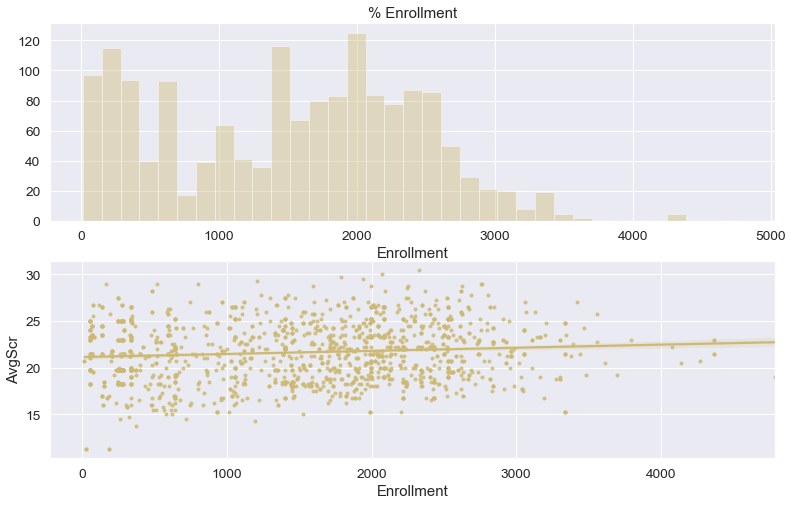

In [41]:
# Distribution plots of the number of enrollment
displot("Enrollment", "y")

## 7. Are the parent ratings and great schools ratings related to the school success?

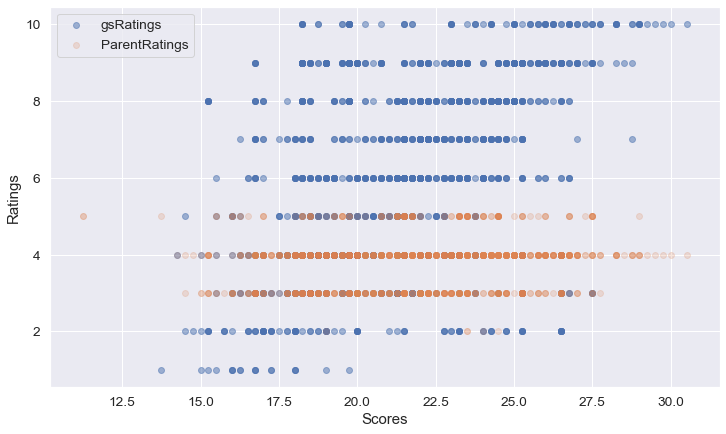

In [42]:
plt.figure(figsize=(12,7))
rt = df[['gsId','gsRating','ParentRating','AvgScr']]
_ = plt.scatter(x=rt['AvgScr'],y=rt['gsRating'],alpha=0.5, label='gsRatings')
_ = plt.scatter(x=rt['AvgScr'],y=rt['ParentRating'], alpha=0.2, label='ParentRatings')
_ = plt.legend(loc='upper left')
_ = plt.xlabel('Scores')
_ = plt.ylabel('Ratings')

As the Act scores are increasing, the great schools ratings are also increasing, but this is not true for parent ratings. We can conclude that there is a strong correlation between the great school ratings and school success, but the parent ratings are not related to the success.

# Correlation Matrix

In [43]:
corr = df.corr()
xticklabels = corr.columns.values
xticklabels

array(['Year', 'gsId', 'Lat', 'Lon', 'Enrollment', 'Plan504',
       'FreeAnd Reduced PriceLunch', 'Enroll12',
       'Percent Teachers InFirst SecondYear',
       'ActSat Number Participation', 'NumTstTakr',
       'ApCourse Participation', 'ApCourse Passed', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21',
       'ParentRating', 'gsRating', 'Asian', 'Black, non-Hispanic',
       'Hispanic', 'Multiracial', 'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'AvgScr'], dtype=object)

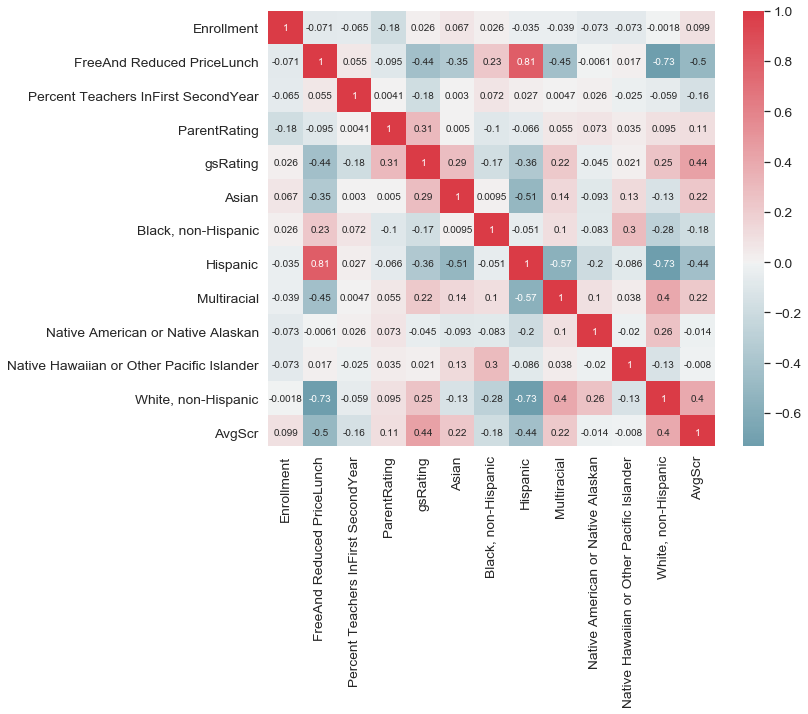

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
df_c = df.loc[:,['Enrollment','FreeAnd Reduced PriceLunch','Percent Teachers InFirst SecondYear','ParentRating', 
                'gsRating', 'Asian', 'Black, non-Hispanic','Hispanic', 'Multiracial',
                 'Native American or Native Alaskan','Native Hawaiian or Other Pacific Islander', 
                 'White, non-Hispanic', 'AvgScr']]
corr = df_c.corr()
#Correlation Matrix
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            center=0, annot=True)
_ = ax.set_xlim(-0.011, len(df_c.columns)-0.01) # preventing the cutoffs at the edges
_ = ax.set_ylim(len(df_c.columns)-0.1, -0.01)

Looking at the correlation matrix we can quickly see that:
* The percentage of Hispanic students are positively correlated to the number of students who receive free and reduced price lunch which represents the number of students with low income. 
* The percentage of White, non-Hispanic students are negatively correlated to the number of students who receive free and reduced price lunch.
* The great schools ratings are negatively correlated to the number of students who receive free and reduced price lunch, but positively correlated to the average Act scores.
* Overall average Act scores are negatively correlated to the number of students who receive free and reduced price lunch and also are negatively correlated to the percentage of Hispanic students.
* There is a strong negative correlation between the percentage of White, non-Hispanic students and Hispanic students.